In [4]:
import os
import json
from shutil import copy

# Scientific modules import
import numpy as np
from skimage import io
from skimage.transform import rescale

import matplotlib.pyplot as plt
import tensorflow as tf

# AxonDeepSeg import modules
from AxonDeepSeg.apply_model import axon_segmentation
from AxonDeepSeg.testing.segmentation_scoring import Metrics_calculator
import AxonDeepSeg.ads_utils as ads
from config import axonmyelin_suffix

%matplotlib inline

/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/groups/bzuchero/miniconda/envs/ads_venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/groups/

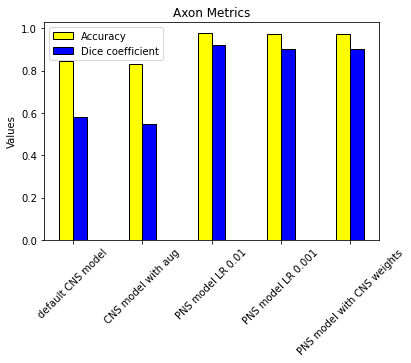

In [22]:
model_names = np.array(['default CNS model', 'CNS model with aug', 'PNS model LR 0.01', 'PNS model LR 0.001', 'PNS model with CNS weights'])
x = np.arange(model_names.size)

axon_accuracy = [0.847530901, 0.830085933208465, 0.979323506, 0.974928796, 0.975359916687011] 
axon_dice = [0.582211708, 0.549016673, 0.920887553, 0.900838859, 0.90313875]

fig, ax = plt.subplots()
barwidth = 0.2
ax.set_title('Axon Metrics')
ax.bar(x - barwidth/2, axon_accuracy, width = barwidth, color = 'yellow', edgecolor = 'black', label = 'Accuracy')
ax.bar(x + barwidth/2, axon_dice, width = barwidth, color = 'blue', edgecolor = 'black', label = 'Dice coefficient')

ax.set_xticks(x)
ax.set_xticklabels(model_names, minor=False, rotation=45)


#ax.set_xticklabels(model_names, minor = False, rotation=45)
ax.legend(loc='best')
ax.set_ylabel('Values')
plt.show()

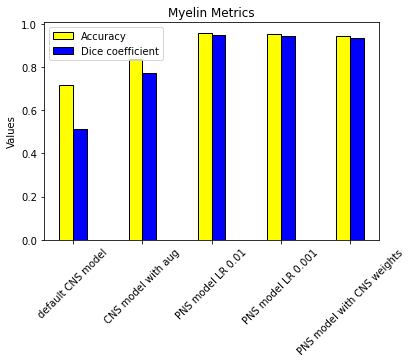

In [26]:
model_names = np.array(['default CNS model', 'CNS model with aug', 'PNS model LR 0.01', 'PNS model LR 0.001', 'PNS model with CNS weights'])
x = np.arange(model_names.size)

myelin_accuracy = [0.717697978, 0.836249292, 0.959444582, 0.955089569, 0.945473075] 
myelin_dice = [0.511267414, 0.773957573, 0.950289496, 0.945050864, 0.933693247]

fig, ax = plt.subplots()
barwidth = 0.2
ax.set_title('Myelin Metrics')
ax.bar(x - barwidth/2, myelin_accuracy, width = barwidth, color = 'yellow', edgecolor = 'black', label = 'Accuracy')
ax.bar(x + barwidth/2, myelin_dice, width = barwidth, color = 'blue', edgecolor = 'black', label = 'Dice coefficient')

ax.set_xticks(x)
ax.set_xticklabels(model_names, minor=False, rotation=45)


#ax.set_xticklabels(model_names, minor = False, rotation=45)
ax.legend(loc='best')
ax.set_ylabel('Values')
plt.show()
